In [535]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics

In [536]:
# Mean
def mean_manual(column):
    total = sum(column)
    count = len(column)
    return total / count if count != 0 else 0

# Correlation
def correlation_manual(x, y):
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)

    numerator = sum((x_i - mean_x) * (y_i - mean_y) for x_i, y_i in zip(x, y))

    denominator_x = sum((x_i - mean_x)**2 for x_i in x)
    denominator_y = sum((y_i - mean_y)**2 for y_i in y)
    denominator = (denominator_x * denominator_y) ** 0.5

    return numerator / denominator if denominator != 0 else 0

# Trimmed mean
def manual_trimmed_mean(data, trim_percent):
    sorted_data = sorted(data)
    trim_count = int(len(sorted_data) * trim_percent / 2)
    trimmed_data = sorted_data[trim_count: -trim_count]
    return sum(trimmed_data) / len(trimmed_data) if len(trimmed_data) > 0 else 0

# Weighted mean
def manual_weighted_mean(values, weights):
    values = values.dropna()
    weights = weights.dropna()
    numerator = sum(value * weight for value, weight in zip(values, weights))
    denominator = sum(weights)
    return numerator / denominator if denominator != 0 else 0

# Mean Absolute Deviation (MAD)
def manual_mean_absolute_deviation(values):
    mean_value = sum(values) / len(values)
    mad = sum(abs(value - mean_value) for value in values) / len(values)
    return mad

# Variance
def manual_variance(values):
    mean_value = sum(values) / len(values)
    variance = sum((value - mean_value) ** 2 for value in values) / len(values)
    return variance

# Standard Deviation
def manual_standard_deviation(values):
    variance = manual_variance(values)
    return variance ** 0.5

# Median Manual
def manual_median(values):
    sorted_values = sorted(values)
    n = len(sorted_values)
    if n % 2 == 1:
        return sorted_values[n // 2]
    else:
        return (sorted_values[n // 2 - 1] + sorted_values[n // 2]) / 2

# Median Absolute Deviation
def manual_median_absolute_deviation(values):
    median_value = manual_median(values)
    absolute_deviations = [abs(value - median_value) for value in values]
    mad = manual_median(absolute_deviations)
    return mad



Metrics:
1. Mean + +
2. Trimmed mean (percentage = 20%) + +
3. Weighted mean (weight = also can be defined by yourself) + +
4. Mean absolute deviation + +
5. Variance +
6. Standard deviation +
7. Median absolute deviation +
8. Correlation coefficient + +

Graphs:
1. Box plot +
2. frequency table +
3. histograms +
4. density plot
5. scatter plots +
explain them


 ### NAME: BARANOV MAXIM
 ### GROUP: IT3-2106
 ### TITLE: GAME ANALYSIS
 ### DESCRIPTION: THIS DATASET TAKEN FROM STEAM CLOUD DATA
 ### Analysis: The dataset is used to analyze the characteristics of games, such as price, rating and reviews, in order to identify patterns and optimize solutions. It is useful for developers, analysts and marketers who can use it for sales forecasts, market analysis and building recommendation systems. In production, the dataset can help in optimizing pricing, developing recommendations, and monitoring market dynamics. Data preprocessing and visualization allow you to better understand the distribution of data and its impact on sales and popularity of games.

 ### Анализ: Датасет используется для анализа характеристик игр, таких как цена, рейтинг и отзывы, с целью выявления закономерностей и оптимизации решений. Он полезен для разработчиков, аналитиков и маркетологов, которые могут применять его для прогнозов продаж, анализа рынка и построения рекомендательных систем. В продакшене датасет может помочь в оптимизации ценообразования, разработке рекомендаций и мониторинге динамики рынка. Предобработка данных и визуализация позволяют лучше понять распределение данных и их влияние на продажи и популярность игр.

In [537]:
df = pd.read_csv('games.csv')

Define the amount of records

In [538]:
df.shape

(50872, 13)

We have 50,872 records

and first we need define the name of Columns

In [539]:
df.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck'],
      dtype='object')

Okay, take a look to our data

In [540]:
df

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


In [541]:
df[df['price_final']>100]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
81,438450,3DF Zephyr Lite Steam Edition,2016-02-02,True,False,False,Very Positive,96,58,199.99,199.99,0.0,True
3688,570090,articy:draft 3,2017-02-16,True,False,False,Very Positive,90,82,114.99,114.99,0.0,True
5024,267810,Clickteam Fusion 2.5 Developer Upgrade,2014-01-27,True,False,False,Positive,100,22,299.99,299.99,0.0,True
5822,1688040,CyberLink PowerDirector 20 Ultimate,2021-11-08,True,False,False,Mixed,60,10,129.99,129.99,0.0,True
6845,1396780,Fantasy Grounds Unity - Ultimate License Upgrade,2020-08-27,True,True,True,Mostly Positive,71,14,109.99,109.99,0.0,True
11276,2200010,Substance 3D Designer 2023,2023-01-31,True,True,True,Positive,90,10,149.99,149.99,0.0,True
12918,2235780,Hidden Post-Apocalyptic 3 Top-Down 3D,2022-12-17,True,True,True,Mostly Positive,75,16,199.99,199.99,0.0,True
13001,2278120,Break Everything - Park,2023-01-27,True,False,False,Positive,100,11,199.99,199.99,0.0,True
13198,1745780,Substance 3D Modeler 2023,2022-12-15,True,False,False,Mixed,69,23,149.99,149.99,0.0,True
14792,1947012,The Cycle: Frontier - Elite Pack,2022-06-08,True,False,False,Mixed,63,41,124.99,124.99,0.0,True


In [542]:
print(df['rating'].unique())

['Very Positive' 'Positive' 'Mixed' 'Mostly Positive'
 'Overwhelmingly Positive' 'Negative' 'Mostly Negative'
 'Overwhelmingly Negative' 'Very Negative']


# Hypothesis 1
## Analysis of the dependence of prices on ratings
Analyze how user ratings relate to the price of the game.

# Method: Mean

In [543]:
# Compare rating, price_original, price_final. What the dependency of this compare.
rating_map_updated = {
    'Overwhelmingly Positive': 4,
    'Very Positive': 3,
    'Mostly Positive': 2,
    'Positive': 1,
    'Mixed': 0,
    'Mostly Negative': -1,
    'Negative': -2,
    'Very Negative': -3,
    'Overwhelmingly Negative': -4
}
df['rating_numeric_updated'] = df['rating'].map(rating_map_updated)
df

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,rating_numeric_updated
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,3
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,1
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,3
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,0
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True,3
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True,-1
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True,3
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True,3


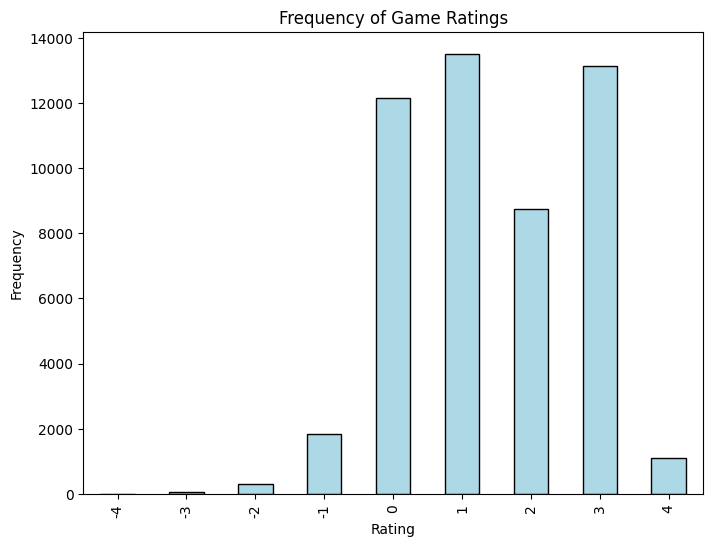

In [544]:
rating_freq_table = df['rating_numeric_updated'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
rating_freq_table.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Frequency of Game Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [545]:
#Manual mean
ratings = df['rating'].unique()
manual_means = []
for rating in ratings:
    subset = df[df['rating'] == rating]
    mean_price_final = mean_manual(subset['price_final'])
    mean_price_original = mean_manual(subset['price_original'])
    price_difference = mean_price_final - mean_price_original
    manual_means.append({
        'rating': rating,
        'mean_price_final': mean_price_final,
        'mean_price_original': mean_price_original,
        'price_difference': price_difference
    })

manual_means_df = pd.DataFrame(manual_means)

In [546]:
#Mean
avg = df.groupby('rating')[['price_final', 'price_original']].mean()
avg['price_difference'] = avg['price_final'] - avg['price_original']
avg

# Games rated "Positive" have the lowest average final price, and in average their final price decreases.
# Games rated "Overwhelmingly Positive" have the highest average final price, price increases.

,price_final,price_original,price_difference
rating,,,
Mixed,8.689993,8.887407,-0.197414
Mostly Negative,8.075890,8.368237,-0.292347
Mostly Positive,9.039239,9.342981,-0.303742
Negative,8.199736,8.683630,-0.483894
Overwhelmingly Negative,8.600000,8.707143,-0.107143
Overwhelmingly Positive,11.943829,9.384532,2.559297
Positive,6.569432,7.210273,-0.640841
Very Negative,10.217500,9.424167,0.793333
Very Positive,10.183092,9.719514,0.463578


In [547]:
manual_means_df

,rating,mean_price_final,mean_price_original,price_difference
0,Very Positive,10.183092,9.719514,0.463578
1,Positive,6.569432,7.210273,-0.640841
2,Mixed,8.689993,8.887407,-0.197414
3,Mostly Positive,9.039239,9.342981,-0.303742
4,Overwhelmingly Positive,11.943829,9.384532,2.559297
5,Negative,8.199736,8.683630,-0.483894
6,Mostly Negative,8.075890,8.368237,-0.292347
7,Overwhelmingly Negative,8.600000,8.707143,-0.107143
8,Very Negative,10.217500,9.424167,0.793333


### Something went wrong, so we need use correlation that check influence between rating and final price

# Method: Correlation

In [548]:
#Manual correlation
rating_numeric = df['rating_numeric_updated'].dropna()
price_final = df['price_final'].dropna()
price_original = df['price_original'].dropna()

correlation_rating_price_final = correlation_manual(rating_numeric, price_final)
correlation_rating_price_original = correlation_manual(rating_numeric, price_original)

correlation_rating_price_final, correlation_rating_price_original

(0.07480190600462612, 0.04324201416268069)

In [549]:
#Correlation
correlation_price_rating = df[['rating_numeric_updated', 'price_final', 'price_original']].corr()
correlation_price_rating

,rating_numeric_updated,price_final,price_original
rating_numeric_updated,1.000000,0.074802,0.043242
price_final,0.074802,1.000000,0.888226
price_original,0.043242,0.888226,1.000000


## rating_numeric_updated and price_final: Weak positive correlation (0.07), which indicates a slight influence of the rating on the final price of the game.

# Scatter Plot

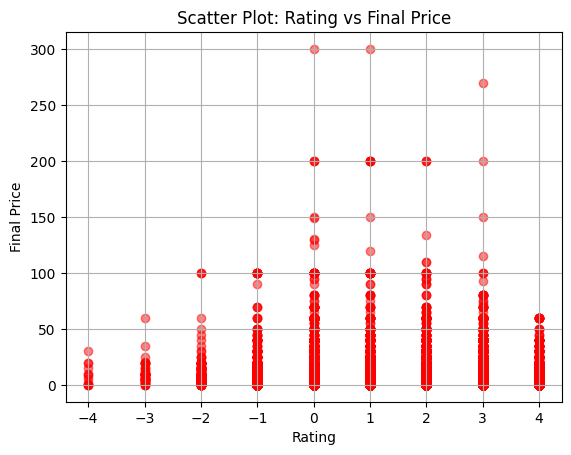

In [550]:
plt.scatter(df['rating_numeric_updated'], df['price_final'], alpha=0.5, color='red')
plt.title('Scatter Plot: Rating vs Final Price')
plt.xlabel('Rating')
plt.ylabel('Final Price')
plt.grid(True)
plt.show()

### So our hypothesis is false

### Conclusion: There is a very weak correlation between the rating of games and their prices (both final and original), which may mean that the user rating does not significantly affect the set prices of games.

## And how often are games sold at a discount?

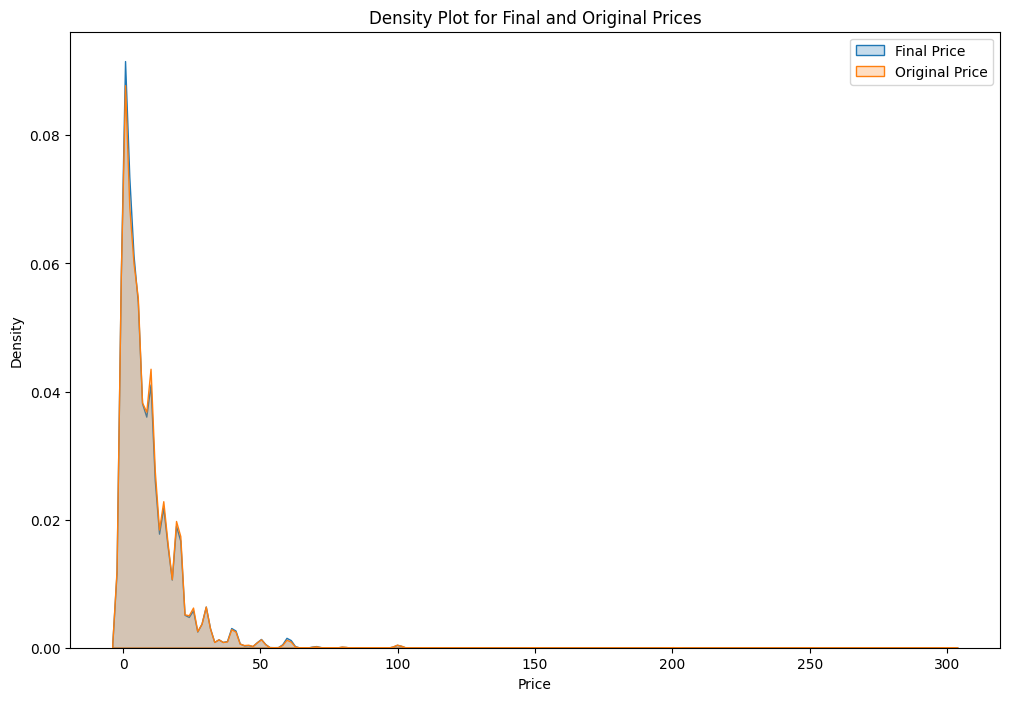

In [551]:
plt.figure(figsize=(12, 8))

sns.kdeplot(df['price_final'], label='Final Price', fill=True)
sns.kdeplot(df['price_original'], label='Original Price', fill=True)

plt.title('Density Plot for Final and Original Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

#### The curves for the final and original prices are almost the same, which suggests that a significant number of games are sold at the same price as their original cost. This indicates that discounts are not provided as often, or that discounts are insignificant.

# Hypothesis 2
### The trimmed average differs from the standard average, which indicates that there are significant price outliers.

# Method: Trimmed Mead

In [552]:
prices = df['price_final']
reviews = df['user_reviews'].replace(0, np.nan)

count    50872.000000
mean         8.620325
std         11.514164
min          0.000000
25%          0.990000
50%          4.990000
75%         10.990000
max        299.990000
Name: price_final, dtype: float64

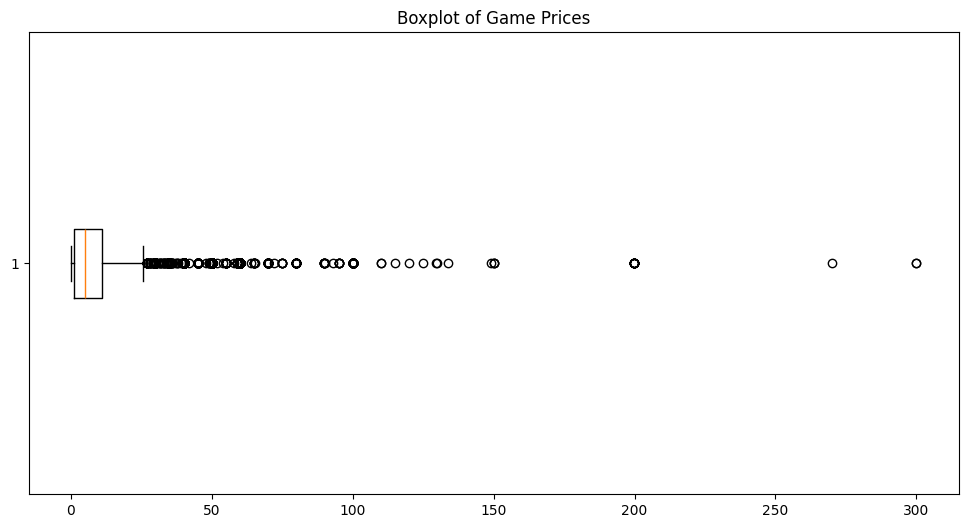

In [553]:
plt.figure(figsize=(12, 6))
plt.boxplot(prices, vert=False)
plt.title('Boxplot of Game Prices')
prices.describe()

Shows the presence of outliers in the data. It can be noted that there are several extremely high prices, which confirms the hypothesis of the presence of emissions.

In [554]:
#Manual trimmed mean
trimmed_mean_price_manual = manual_trimmed_mean(prices, 0.2)

#Trimmed mean
standard_mean_price = prices.mean()
trimmed_mean_price = stats.trim_mean(prices, 0.2)
trimmed_mean_price_manual, trimmed_mean_price

(6.610604943730601, np.float64(5.9059356571877855))

# Histogram

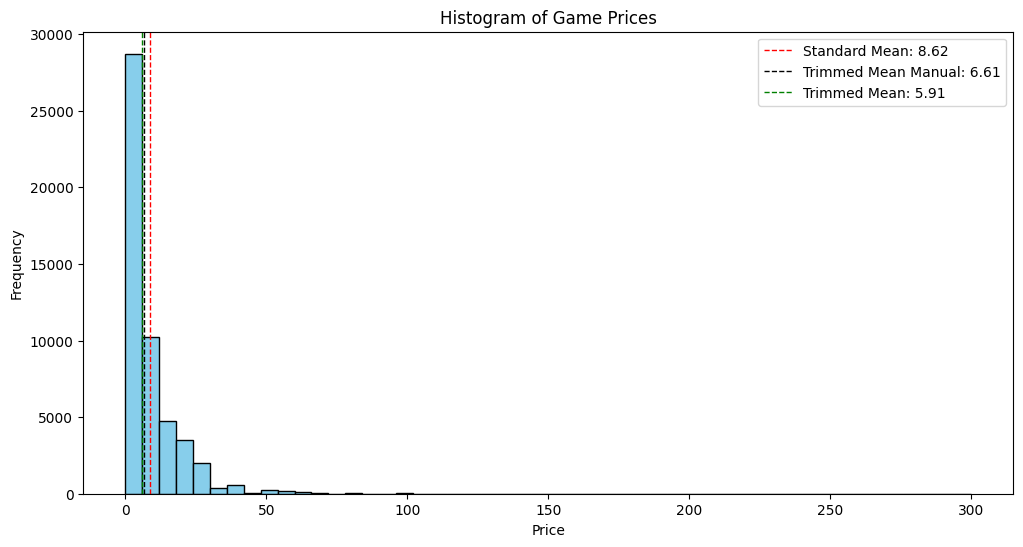

In [555]:
plt.figure(figsize=(12, 6))
plt.hist(prices, bins=50, color='skyblue', edgecolor='black')
plt.axvline(standard_mean_price, color='red', linestyle='dashed', linewidth=1, label=f'Standard Mean: {standard_mean_price:.2f}')
plt.axvline(trimmed_mean_price_manual, color='black', linestyle='dashed', linewidth=1, label=f'Trimmed Mean Manual: {trimmed_mean_price_manual:.2f}')
plt.axvline(trimmed_mean_price, color='green', linestyle='dashed', linewidth=1, label=f'Trimmed Mean: {trimmed_mean_price:.2f}')
plt.title('Histogram of Game Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()

### Shows the presence of outliers in the data. It can be noted that there are several extremely high prices, which confirms the hypothesis of the presence of emissions.

### Thus, the hypothesis is confirmed: emissions (very high prices) significantly affect the standard average. The cropped average gives a more realistic view of the typical price.

## So this hypothesis is more likely truly show our real mean without outliers

# Hypothesis 3
### The more reviews a game has, the more accurate its score.

## Method: Weighted Mean

In [556]:
# Manual Weighted Mean
ratings = df['rating_numeric_updated'].dropna()
user_reviews = df['user_reviews'].replace(0, np.nan).dropna()
weighted_mean_rating_manual = manual_weighted_mean(ratings, user_reviews)

# Weighted Mean
mean_rating = df['rating_numeric_updated'].mean()
weighted_mean_rating = np.average(df['rating_numeric_updated'], weights=df['user_reviews'].replace(0, np.nan))

In [557]:
print(f"Average value of rating: {mean_rating}")
print(f"Weighted mean (by amount of reviews): {weighted_mean_rating}")
print(f"Weighted mean (by amount of reviews) MANUAL: {weighted_mean_rating_manual}")

Average value of rating: 1.4181475074697278
Weighted mean (by amount of reviews): 2.830224993823007
Weighted mean (by amount of reviews) MANUAL: 2.830224993823007


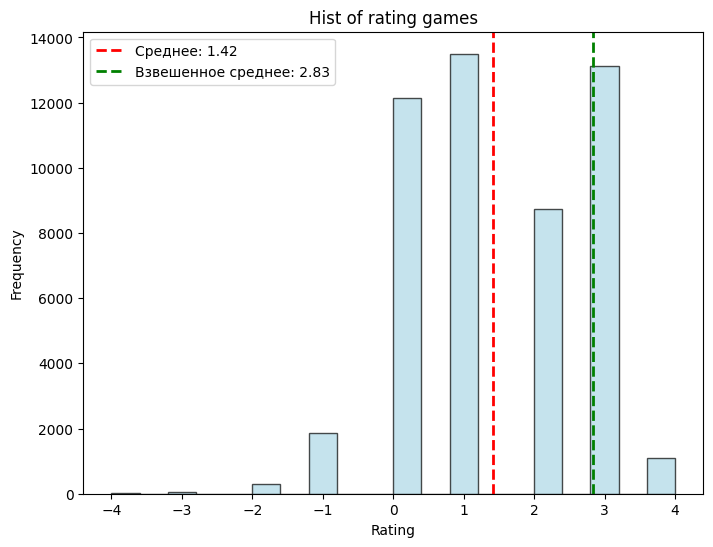

In [558]:
plt.figure(figsize=(8, 6))
plt.hist(df['rating_numeric_updated'], bins=20, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_rating, color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_rating:.2f}')
plt.axvline(weighted_mean_rating, color='green', linestyle='dashed', linewidth=2, label=f'Взвешенное среднее: {weighted_mean_rating:.2f}')
plt.title('Hist of rating games')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### This weighted mean show us that reviews no change score, because it's change on wrong size, and standard mean seems more truly

# Hypothesis 4
### Prices for games vary depending on the platform (MAD comparison for games on different platforms).

In [559]:
mad_windows = np.mean(np.abs(df[df['win'] == True]['price_final'] - df[df['win'] == True]['price_final'].mean()))
mad_mac = np.mean(np.abs(df[df['mac'] == True]['price_final'] - df[df['mac'] == True]['price_final'].mean()))
mad_linux = np.mean(np.abs(df[df['linux'] == True]['price_final'] - df[df['linux'] == True]['price_final'].mean()))
print(f"MAD Windows: {mad_windows}")
print(f"MAD Mac: {mad_mac}")
print(f"MAD Linux: {mad_linux}")

MAD Windows: 7.525063444677598
MAD Mac: 6.626764300802314
MAD Linux: 6.60081150524676


In [560]:
mad_windows_manual = manual_mean_absolute_deviation(df[df['win'] == True]['price_final'].dropna())
mad_mac_manual = manual_mean_absolute_deviation(df[df['mac'] == True]['price_final'].dropna())
mad_linux_manual = manual_mean_absolute_deviation(df[df['linux'] == True]['price_final'].dropna())
print(f"MAD Windows (Manual): {mad_windows_manual}")
print(f"MAD Mac (Manual): {mad_mac_manual}")
print(f"MAD Linux (Manual): {mad_linux_manual}")

MAD Windows (Manual): 7.525063444674073
MAD Mac (Manual): 6.62676430080269
MAD Linux (Manual): 6.600811505247015


In [561]:
# plt.figure(figsize=(10, 6))
# platforms = ['win', 'mac', 'linux']
# for i, platform in enumerate(platforms):
#     plt.boxplot(df[df[platform] == True]['price_final'], positions=[i+1], widths=0.6)
#
# plt.xticks([1, 2, 3], ['Windows', 'Mac', 'Linux'])
# plt.title('Распределение цен для разных платформ')
# plt.ylabel('Цена')
# plt.show()

## Windows:
#### Windows has the highest MAD value (7.53), which indicates a wider price spread. This indicates that both premium games with high prices and budget games are available on Windows.

## Mac and Linux:
#### Mac and Linux have similar MAD values (6.63 and 6.60, respectively), which indicates more stable prices compared to Windows. This mean that for these platforms, game prices are in a narrower range, and games vary less in cost.

# Hypothesis 5
### Games with higher ratings have a smaller spread in price (comparison of variance).

In [562]:
# Manual Variance
high_rating_prices = df[df['rating_numeric_updated'] >= 3]['price_final'].dropna()
low_rating_prices = df[df['rating_numeric_updated'] < 3]['price_final'].dropna()
high_rating_var_manual = manual_variance(high_rating_prices)
low_rating_var_manual = manual_variance(low_rating_prices)
print(f"Variance of prices for high-rated games (manual): {high_rating_var_manual}")
print(f"Variance of prices for low-rated games (manual): {low_rating_var_manual}")

# Variance
high_rating_var = df[df['rating_numeric_updated'] >= 3]['price_final'].var()
low_rating_var = df[df['rating_numeric_updated'] < 3]['price_final'].var()

print(f"Variance of prices for high-rated games: {high_rating_var}")
print(f"Variance of prices for low-rated games: {low_rating_var}")

Variance of prices for high-rated games (manual): 131.4647518833062
Variance of prices for low-rated games (manual): 131.44292991951343
Variance of prices for high-rated games: 131.47397877494402
Variance of prices for low-rated games: 131.44651909894785


## Conclusion:
#### Since the variances for high and low rated games are very similar (the difference is small: 131.47 vs. 131.45), it can be concluded that the pricing policy for games does not strongly depend on their rating.

# Hypothesis 6
### Games with more reviews have more predictable prices (comparing the standard deviation).

In [563]:
high_reviews_prices = df[df['user_reviews'] >= 1000]['price_final'].dropna()
low_reviews_prices = df[df['user_reviews'] < 1000]['price_final'].dropna()
high_reviews_std_manual = manual_standard_deviation(high_reviews_prices)
low_reviews_std_manual = manual_standard_deviation(low_reviews_prices)

print(f"Standard deviation of prices for games with high reviews (manual): {high_reviews_std_manual}")
print(f"Standard deviation of prices for games with low reviews (manual): {low_reviews_std_manual}")


# Standard deviation
high_reviews_std = df[df['user_reviews'] >= 1000]['price_final'].std()
low_reviews_std = df[df['user_reviews'] < 1000]['price_final'].std()

print(f"Standard deviation of prices for games with high reviews: {high_reviews_std}")
print(f"Standard deviation of prices for games with low reviews: {low_reviews_std}")

Standard deviation of prices for games with high reviews (manual): 14.192712160794528
Standard deviation of prices for games with low reviews (manual): 10.939455918628592
Standard deviation of prices for games with high reviews: 14.194047505592923
Standard deviation of prices for games with low reviews: 10.93957598399736


## Standard deviation of prices for games with high reviews: 14.19:
#### This value indicates a significant price spread among games with a large number of reviews.

## Standard deviation of prices for games with low reviews: 10.94:
#### The price spread among games with a small number of reviews is smaller, which means more stable and predictable prices.

# Hypothesis 7
### Discounted game prices vary less than non-discounted prices (comparison of the median absolute deviation).

In [564]:
# Manual Median Absolute Deviation
discounted_prices = df[df['discount'] > 0]['price_final'].dropna()
non_discounted_prices = df[df['discount'] == 0]['price_final'].dropna()
mad_discounted_manual = manual_median_absolute_deviation(discounted_prices)
mad_non_discounted_manual = manual_median_absolute_deviation(non_discounted_prices)

print(f"Median absolute deviation for discounted games (manual): {mad_discounted_manual}")
print(f"Median absolute deviation for non-discounted games (manual): {mad_non_discounted_manual}")

# Medain Absolute Deviation
mad_discounted = np.median(np.abs(df[df['discount'] > 0]['price_final'] - np.median(df[df['discount'] > 0]['price_final'])))
mad_non_discounted = np.median(np.abs(df[df['discount'] == 0]['price_final'] - np.median(df[df['discount'] == 0]['price_final'])))

print(f"Median absolute deviation for discounted games: {mad_discounted}")
print(f"Median absolute deviation for non-discounted games: {mad_non_discounted}")

Median absolute deviation for discounted games (manual): 2.0
Median absolute deviation for non-discounted games (manual): 4.99
Median absolute deviation for discounted games: 2.0
Median absolute deviation for non-discounted games: 4.99


## Median absolute deviation for discounted games: 2.0
#### This indicates a small price spread, which indicates the stability and predictability of prices for discounted games. Most discounted games have about the same price.

## Median absolute deviation for games without discounts: 4.99
#### higher price range than discounted games. This suggests that the prices for games without discounts are more diverse and include both budget and premium options.